### Relax Ultimate Challenge:-

The data is available as two attached CSV files:

takehome_user_engagement. csv

takehome_users . csv

The data has the following two tables:

1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. 

This takes on one of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's personal workspace

○ GUEST_INVITE: invited to an organization as a guest (limited permissions)

○ ORG_INVITE: invited to an organization (as a full member)

○ SIGNUP: signed up via the website

○ SIGNUP_GOOGLE_AUTH: signed up using Google

Authentication (using a Google email account for their login id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday
period , identify which factors predict future user adoption.

Please send us a brief writeup of your findings (the more concise, the better no more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
### import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

#### Loading Data:-

In [2]:
#Import data from source
#df_users = pd.read_csv('takehome_users.csv')
df_users_engage = pd.read_csv('takehome_user_engagement.csv')

In [3]:
df_users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')

In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_users_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df_users = df_users.rename(columns={'object_id': 'user_id'})

##### Data Wrangling:-

In [7]:
#Changing the Dates to Datetime Object Type
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'])
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users_engage['time_stamp'] = pd.to_datetime(df_users_engage['time_stamp'])

In [18]:
df_users['creation_time'].min(), df_users['creation_time'].max()

(Timestamp('2012-05-31 00:43:00'), Timestamp('2014-05-30 23:59:00'))

In [19]:
df_users_engage.rename(columns={'time_stamp': 'visit_timestamp'},inplace=True)

In [20]:
df_users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [21]:
df_creation = df_users.groupby('creation_source')['user_id'].count()

In [22]:
df_creation

creation_source
GUEST_INVITE          2163
ORG_INVITE            4254
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: user_id, dtype: int64

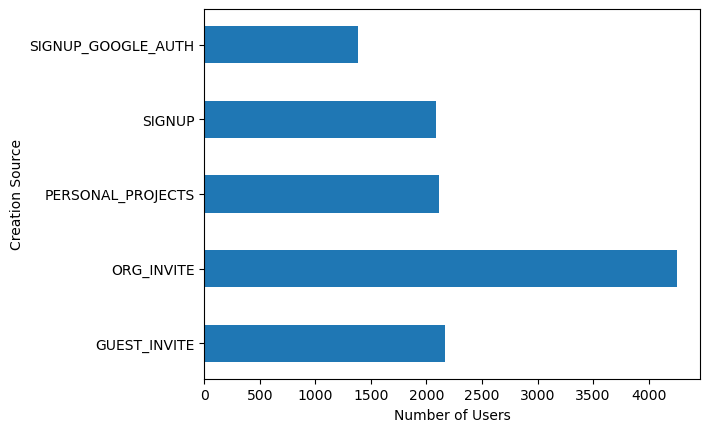

In [23]:
plt.barh(df_creation.index, df_creation.values,height=0.5)
plt.ylabel('Creation Source')
plt.xlabel('Number of Users')
plt.show()

In [26]:
df_users['opted_in_to_mailing_list'].unique()

array([1, 0], dtype=int64)

#### Finding the Adopted Users

In [27]:
#User who has logged into the product on three separate days in at least one sevenday period
df_users_engage['date'] = pd.to_datetime(df_users_engage['visit_timestamp'].dt.date)

In [28]:
def rolling_count(df_roll, frequency):
    df_roll = df_roll.rolling(frequency, on='date')['user_id'].count()
    return df_roll

In [29]:
df_users_engage['visit_7_days'] = df_users_engage.groupby('user_id', group_keys=False).apply(rolling_count, '7D')

In [30]:
# Finding the users who visited 3 or more times in a 7 day period
df_users_engage[df_users_engage['visit_7_days']>= 3]

,visit_timestamp,user_id,visited,date,visit_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27,5.0


In [31]:
# Finding the max visits by a user id
adopted_users = df_users_engage.groupby('user_id')['visit_7_days'].max().reset_index()

In [32]:
adopted_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       8823 non-null   int64  
 1   visit_7_days  8823 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 138.0 KB


In [33]:
adopted_users['adopted_user'] = adopted_users['visit_7_days'].apply(lambda user: 1 if user>=3 else 0)

In [34]:
adopted_users['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [35]:
adopted_users.drop(columns=['visit_7_days'], inplace=True)

In [36]:
adopted_users.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [37]:
#joining the adopted_user to main df
df = pd.merge(df_users,adopted_users,on='user_id',how='left')

In [38]:
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:00,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:00,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:00,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:00,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:00,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
 8   adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 937.5+ KB


In [40]:
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0)
df['adopted_user'] = df['adopted_user'].fillna(0)
df['last_session_creation_time'] = df['last_session_creation_time'].fillna(0)

In [41]:
#We add a new columns called 'days_since_creation' which is the difference between last visit timestamp and creation time
df['days_since_creation'] = (df_users_engage.visit_timestamp.max() - df.creation_time).dt.days

In [42]:
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation
0,1,2014-04-22 03:53:00,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0,45
1,2,2013-11-15 03:45:00,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0,203
2,3,2013-03-19 23:14:00,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0,443
3,4,2013-05-21 08:09:00,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0,381
4,5,2013-01-17 10:14:00,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0,505


In [43]:
#Removing the Data columns before model creation
df = df.drop(columns=['creation_time', 'last_session_creation_time'], axis=1)
#df = df.drop(columns=['last_session_creation_time'], axis=1)

In [44]:
df.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation
0,1,GUEST_INVITE,1,0,11,10803.0,0.0,45
1,2,ORG_INVITE,0,0,1,316.0,1.0,203
2,3,ORG_INVITE,0,0,94,1525.0,0.0,443
3,4,GUEST_INVITE,0,0,1,5151.0,0.0,381
4,5,GUEST_INVITE,0,0,193,5240.0,0.0,505


In [45]:
#performing one hot encoding
df = pd.get_dummies(df)

In [46]:
df.shape

(12000, 12)

#### Data Pre-Processing:-

In [47]:
# Removing invited_by_user_id  as it has no relevance
df = df.drop(columns='invited_by_user_id',axis=1)

In [48]:
# We will do Random Forrest to find the most important feature causing adoptability 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [49]:
#drop the target variable and split the data
X = df.drop(columns=['adopted_user'],axis=1)
y = df['adopted_user']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#### Modelling:-

In [51]:
# We choose Random Forest as our Model for finding the Adopted Users
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_score = accuracy_score(y_pred,y_test)

In [52]:
print('Accuracy Score of the Model is:',acc_score)

Accuracy Score of the Model is: 0.8613888888888889


Our Model gave a Accuracy Score of 86.14% in predicting the Users more like to become Adopted users viz. who will login at least 3 times a week. 
Lets see if we can optimize to improve this Score for better.

### Hyperparameter Optimization

In [53]:
#defining the Param grids
n_estimators = [10,20,50,100,200]
max_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_estimators, 'max_features': max_options, 'oob_score': oob_options}

In [ ]:
rf_cv = GridSearchCV(rf,param_grid=param_grid,cv=5)
rf_cv.fit(X_train,y_train)
y_predict = rf_cv.predict(X_test)

In [ ]:
best_parm = rf_cv.best_params_
best_score = rf_cv.best_score_

In [ ]:
print('Best Params are',best_parm)
print('Best Score is:',best_score)

In [ ]:
#Predicting the Result using the best Parameters found above

rf_best = RandomForestClassifier(n_estimators=200, max_features= 8, oob_score= False)
rf_best.fit(X_train,y_train)
y_predi = rf_best.predict(X_test)

In [ ]:
#Checking Model Accuracy
print('Accuracy of the Model is:',accuracy_score(y_predi, y_test))
print('Classification_Report\n',classification_report(y_test,y_predi))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predi))
print('Best Features:\n',rf_best.feature_importances_)

#### Feature Importance:-

In [ ]:
df_imp_feature = pd.DataFrame({'feature': X.columns, 'importance': rf_best.feature_importances_})

In [ ]:
df_imp_feature = df_imp_feature.sort_values(by='importance',ascending=False)
df_imp_feature.sort_values(by='importance', inplace=True)

In [ ]:
#df_imp_feature = df_imp_feature.set_index('feature', drop=True)

In [ ]:
#df_imp_feature.reset_index(inplace=True)

In [ ]:
_ = df_imp_feature.plot(kind='barh',x='feature',y='importance')
plt.show()

#### Conclusion:-

The top 5 important features seem to be:

1. user_id

2. days_since_creation

3. org_id

4. opted_in_to_mailing_list

5. enabled_for_marketing_drip

Our Model has an Accuracy of 86% in predicting the Users who are likely to login 3 or more times in a 7 day period. The above features have an impact on the usage and we should try to address these in order to increase user logins.